In [1]:
#In this project, I used a credit card fraud dataset from Kaggle to perform Exploratory Data Analysis and build a Machine Learning model to improve the accuracy of the Area Under the Precision-Recall Curve (AUPRC).

In [2]:
# Imbalance of the data

In [5]:
# Is there a time period when fraud transactions happen more commonly?

In [6]:
# Are the V# features correlated to each other and the target variable?

In [7]:
# Is there a certain transaction amount that seems ridiculously high which can indicate whether a transaction is fraudulent?

In [8]:
# Are there any missing values in any of the columns that are more common in fraudulent transactions?

In [81]:
# exploratory data analysis: determining the shape of the dataset, identifying the type of data objects in each column, identifying the missing values, determining the correlation values

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('creditcard.csv')
print("First 5 rows in the dataset: \n", df.head())

First 5 rows in the dataset: 
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

In [80]:
print("Last 5 rows in the dataset: \n", df.tail())

Last 5 rows in the dataset: 
             Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  

In [76]:
print("There are", df.shape[1], "columns and", df.shape[0],"rows in the dataset")

There are 31 columns and 284807 rows in the dataset


In [63]:
print("Is there any null value in the dataset: ", df.isna().values.any())

Is there any null value in the dataset:  False


In [19]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [37]:
print('Number of fraudulent transactions: ', df.groupby('Class').count()['Time'][1])

Number of fraudulent transactions:  492


In [40]:
print('Number of valid transactions: ', df.shape[0] - df.groupby('Class').count()['Time'][1])

Number of valid transactions:  284315


In [46]:
print('Proportion of fraudulent/valid transactions: \n', ((df.groupby('Class').count()['Time'][1] / df.shape[0]) * 100).round(2), "%")

Proportion of fraudulent/valid transactions: 
 0.17 %


In [60]:
print("Average Amount in a fraudulent transaction: ", df[df['Class'] == 1]['Amount'].mean().round(2))

Average Amount in a fraudulent transaction:  122.21


In [61]:
print("Average Amount in a valid transaction: ", df[df['Class'] == 0]['Amount'].mean().round(2))

Average Amount in a valid transaction:  88.29


In [62]:
print('Summary of Amount column: \n', df['Amount'].describe())

Summary of Amount column: 
 count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [82]:
print("Determine the correlation between variables in the dataset: ")

Determine the correlation between variables in the dataset: 


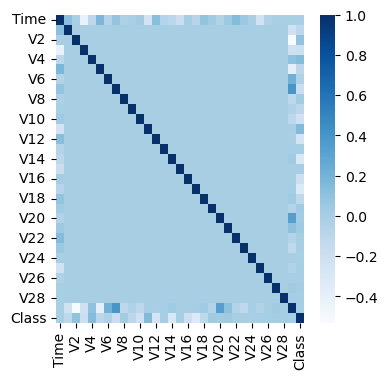

In [88]:
fig=plt.figure(figsize= (4, 4)) 
sns.heatmap(df.corr(), cmap='Blues')
plt.show()

In [90]:
# The heat-map above shows that:
# There are no high correlation values among the predictor columns
# No predictor column has a high correlation value with the Class column
# However there exists a negative correlation among V2 and Amount as well as a positive correlation among V7 and the Amount feature